In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('training.csv')

In [5]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


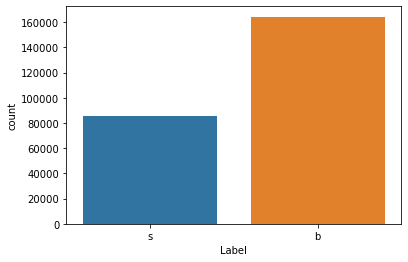

In [7]:
import seaborn as sns
sns.countplot(df['Label'],label="Count")
plt.show()

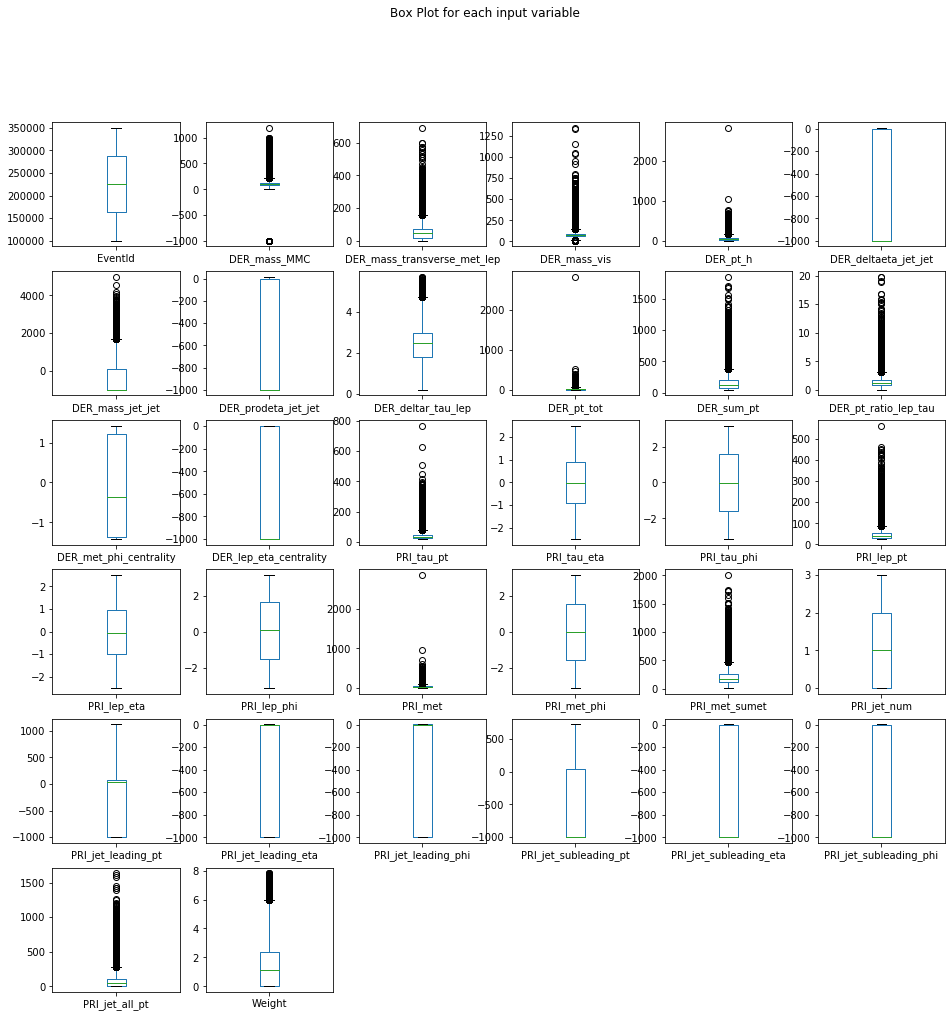

In [11]:
df.drop('Label', axis=1).plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(16,16), 
                                        title='Box Plot for each input variable')
plt.savefig('cs_box')
plt.show()

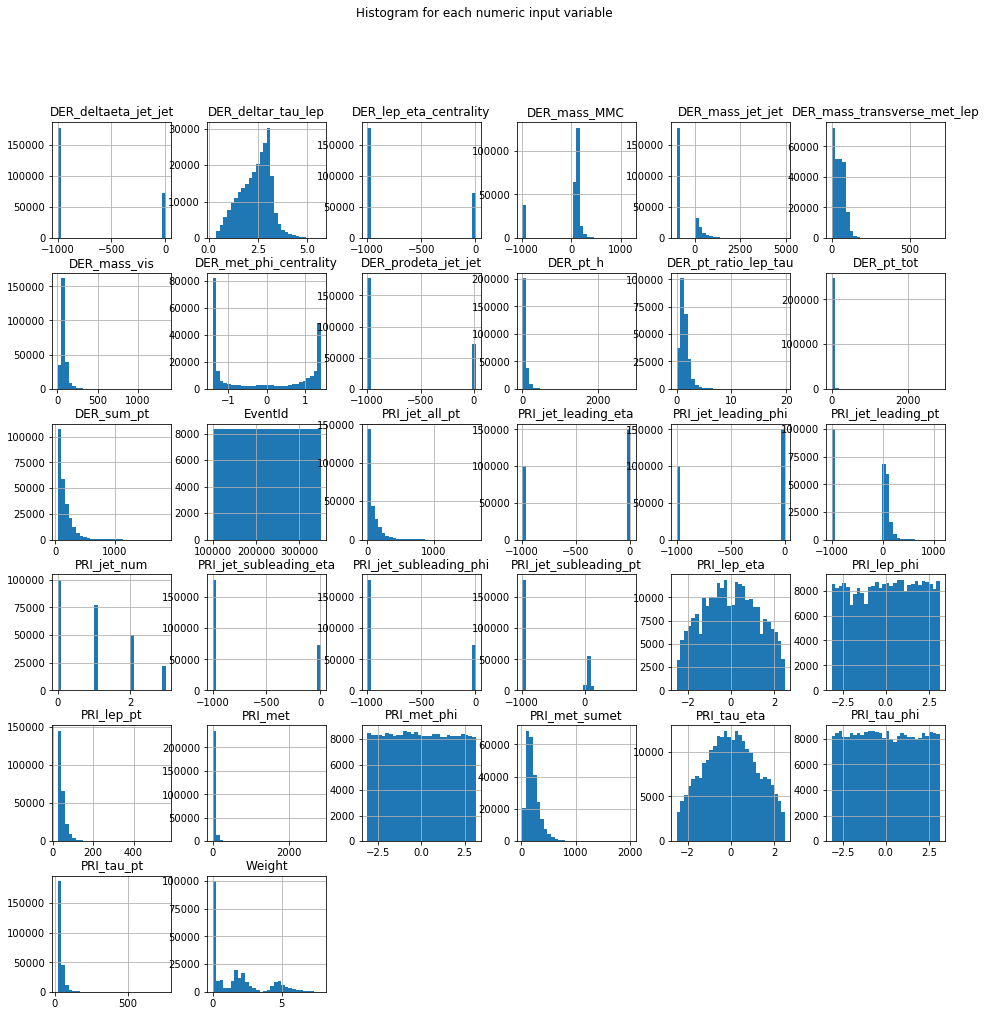

In [10]:
import pylab as pl
df.drop('Label' ,axis=1).hist(bins=30, figsize=(16,16))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

In [12]:
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [14]:
#from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight']
X = df[feature_names]
y = df['Label']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(187500, 31)
(62500, 31)
(187500,)
(62500,)


In [19]:
dfTrain = pd.DataFrame(data=np.column_stack((scaler.inverse_transform(X_train), y_train)),
                       columns=['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'])

In [20]:
dfTest = pd.DataFrame(data=np.column_stack((scaler.inverse_transform(X_test), y_test)),
                      columns=['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'])

In [21]:
accTrain=[]
accTest=[]

In [22]:
modelNames=['Logistic', 'DecisionTress','KNN','LDA','GuassianNB','SVM']

In [23]:
dfPredictions=pd.DataFrame(data=np.column_stack((scaler.inverse_transform(X_test), y_test)),columns=['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'])

In [24]:
dfResultsSummary=pd.DataFrame(data=np.row_stack(modelNames), columns=['Model'])

In [25]:
print(dfPredictions)
print(dfResultsSummary)

      DER_mass_MMC DER_mass_transverse_met_lep DER_mass_vis DER_pt_h  \
0          128.224                      76.169       91.298   67.701   
1             -999                      79.879        31.01    2.436   
2          103.989                      60.866       78.873    34.15   
3          164.803                      10.788       75.342   58.663   
4           87.733                      18.887       56.224   80.261   
...            ...                         ...          ...      ...   
62495         -999                      71.408       47.094    1.126   
62496       89.116                      75.479       74.914    4.479   
62497       69.339                      32.193       55.665    1.846   
62498      143.296                      81.754       85.632   13.786   
62499       92.728                      54.893       73.922   32.876   

      DER_deltaeta_jet_jet DER_mass_jet_jet DER_prodeta_jet_jet  \
0                     -999             -999                -999   
1

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


In [27]:
accTrain.append(logreg.score(X_train,y_train))
accTest.append(logreg.score(X_test,y_test))
dfPredictions[modelNames[0]+'_pred'] = logreg.predict(X_test)

# Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [29]:
accTrain.append(clf.score(X_train,y_train))
accTest.append(clf.score(X_test,y_test))
dfPredictions[modelNames[1]+'_pred'] = clf.predict(X_test)

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.90


In [31]:
accTrain.append(knn.score(X_train,y_train))
accTest.append(knn.score(X_test,y_test))
dfPredictions[modelNames[2]+'_pred'] = knn.predict(X_test)

# LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.90
Accuracy of LDA classifier on test set: 0.90


In [33]:
accTrain.append(lda.score(X_train,y_train))
accTest.append(lda.score(X_test,y_test))
dfPredictions[modelNames[3]+'_pred'] = lda.predict(X_test)

# Gaussian

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.98
Accuracy of GNB classifier on test set: 0.98


In [36]:
accTrain.append(gnb.score(X_train,y_train))
accTest.append(gnb.score(X_test,y_test))
dfPredictions[modelNames[5]+'_pred'] = gnb.predict(X_test)

# SVM

In [41]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.96


In [42]:
accTrain.append(svm.score(X_train,y_train))
accTest.append(svm.score(X_test,y_test))
dfPredictions[modelNames[5]+'_pred'] = svm.predict(X_test)

In [43]:
dfResultsSummary['acc_train']=accTrain
dfResultsSummary['acc_test']=accTest

In [44]:
accTrain

[0.9615626666666667, 1.0, 0.932112, 0.8963626666666666, 0.975408, 0.957904]

In [45]:
accTest

[0.961392, 1.0, 0.902656, 0.897024, 0.976512, 0.957824]

In [46]:
dfResultsSummary

,Model,acc_train,acc_test
0,Logistic,0.961563,0.961392
1,DecisionTress,1.000000,1.000000
2,KNN,0.932112,0.902656
3,LDA,0.896363,0.897024
4,GuassianNB,0.975408,0.976512
5,SVM,0.957904,0.957824


In [47]:
dfTrain.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,164.775,79.693,83.787,61.85,-999,-999,-999,2.61,19.963,136.688,...,1,46.758,-2.395,0.212,-999,-999,-999,46.758,0.0186361,s
1,-999,59.713,68.781,2.603,-999,-999,-999,2.22,2.603,73.366,...,0,-999,-999,-999,-999,-999,-999,0,1.94178,b
2,62.821,64.855,50.318,57.742,-999,-999,-999,1.201,13.432,135.05,...,1,44.635,0.812,-2.059,-999,-999,-999,44.635,1.92916,b
3,133.717,11.215,62.339,98.757,0.369,82.217,0.506,2.498,23.959,237.628,...,3,107.618,0.551,-0.186,34.937,0.919,1.168,176.248,0.00150187,s
4,-999,71.91,18.459,2.812,-999,-999,-999,0.776,2.812,49.084,...,0,-999,-999,-999,-999,-999,-999,0,1.98116,b


In [48]:
dfTest.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,128.224,76.169,91.298,67.701,-999,-999,-999,3.1,67.701,88.916,...,0,-999,-999,-999,-999,-999,-999,0,0.00150187,s
1,-999,79.879,31.01,2.436,-999,-999,-999,1.08,2.436,55.647,...,0,-999,-999,-999,-999,-999,-999,0,4.7593,b
2,103.989,60.866,78.873,34.15,-999,-999,-999,2.793,20.42,138.227,...,1,54.57,-0.686,0.23,-999,-999,-999,54.57,2.16063,b
3,164.803,10.788,75.342,58.663,5.541,840.902,-6.339,3.121,1.064,178.297,...,2,75.306,-3.927,-0.785,36.604,1.614,-3.065,111.909,0.0015027,s
4,87.733,18.887,56.224,80.261,-999,-999,-999,1.79,0.5,144.409,...,1,80.132,1.12,-0.004,-999,-999,-999,80.132,0.0738991,b


In [49]:
dfPredictions.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,Logistic_pred,DecisionTress_pred,KNN_pred,LDA_pred,SVM_pred
0,128.224,76.169,91.298,67.701,-999,-999,-999,3.1,67.701,88.916,...,-999,-999,0,0.00150187,s,s,s,s,s,s
1,-999,79.879,31.01,2.436,-999,-999,-999,1.08,2.436,55.647,...,-999,-999,0,4.7593,b,b,b,b,b,b
2,103.989,60.866,78.873,34.15,-999,-999,-999,2.793,20.42,138.227,...,-999,-999,54.57,2.16063,b,b,b,b,b,b
3,164.803,10.788,75.342,58.663,5.541,840.902,-6.339,3.121,1.064,178.297,...,1.614,-3.065,111.909,0.0015027,s,s,s,s,s,s
4,87.733,18.887,56.224,80.261,-999,-999,-999,1.79,0.5,144.409,...,-999,-999,80.132,0.0738991,b,s,b,b,s,s


In [50]:
dfTrain.to_csv('train_higgs.csv')
dfTest.to_csv('test_higgs.csv')
dfResultsSummary.to_csv('summary_higgs.csv')
dfPredictions.to_csv('predictions_higgs.csv')

In [53]:
dfResultsSummary

,Model,acc_train,acc_test
0,Logistic,0.961563,0.961392
1,DecisionTress,1.000000,1.000000
2,KNN,0.932112,0.902656
3,LDA,0.896363,0.897024
4,GuassianNB,0.975408,0.976512
5,SVM,0.957904,0.957824


In [58]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
# https://sdsawtelle.github.io/blog/output/week6-andrew-ng-machine-learning-with-python.html

# KNN - Analysis

In [ ]:
k_range = range(1, 20)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

In [ ]:
plt.plot(range(1,26),scores)
plt.xlabel('Number of K')
plt.ylabel('Scores')
plt.title('Number of Clusters Vs Prediction Scores')

In [54]:
# Logistic

In [55]:
from sklearn.model_selection import learning_curve

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [66]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print(integer_encoded)

[1 0 0 ... 0 0 0]


In [80]:
#from sklearn.linear_model
import snips as snp
#snp.prettyplot(matplotlib)  # my aesthetic preferences for plotting
%matplotlib inline

In [67]:
train_sz, train_errs, cv_errs = learning_curve(estimator=logreg, X=X_train, y=y_train_encoded, cv=4,
                                              train_sizes=np.linspace(0.05, 1, 20),
                                              scoring="neg_mean_squared_error")  

# For each training subset, compute average error over the 3-fold cross val
tr_err = np.mean(train_errs, axis=1)
cv_err = np.mean(cv_errs, axis=1)

c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\fakru\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


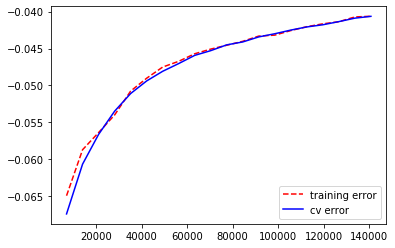

In [78]:
# Plot the errors to make a learning curve!
fig, ax = plt.subplots()
ax.plot(train_sz, tr_err, linestyle="--", color="r", label="training error")
ax.plot(train_sz, cv_err, linestyle="-", color="b", label="cv error")

#snp.labs("Training Set Size", "Score (4-Fold CV avg)", "LC with High Bias")
ax.legend(loc="lower right")

# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

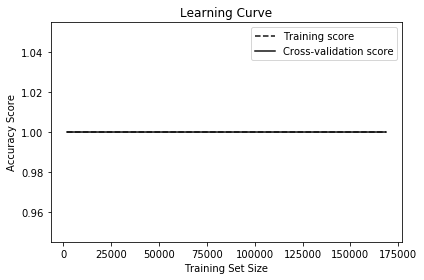

In [71]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        y_train_encoded,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()